We solve the 3x3 differential Bloch Equation both numerically and analytically

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import time

In [2]:
def Mx(t, M0, w0, T1, T2):
    return (M0[0]*np.cos(w0*t) + M0[1]*np.sin(w0*t)) * np.exp(-t/T2)

In [3]:
def My(t, M0, w0, T1, T2):
    return (M0[1]*np.cos(w0*t) - M0[0]*np.sin(w0*t)) * np.exp(-t/T2)

In [4]:
def Mz(t, M0, w0, T1, T2):
#     return (M0[2] * np.exp(-t/T1)) + (np.linalg.norm(M0) * (1 - np.exp(-t/T1)))
    return (M0[2] * np.exp(-t/T1)) + (1 * (1 - np.exp(-t/T1)))

In [5]:
def Rx(v, theta):
    theta = np.radians(theta)
    R = np.array([[1, 0, 0],
                  [0, np.cos(theta), -np.sin(theta)],
                  [0, np.sin(theta), np.cos(theta)]])
    return np.matmul(R, v)

In [6]:
def M_analytic(tr, M0, gamma, B0, T1, T2):
    dt = 0.0001
    t = np.arange(0, tr, dt)
    w0 = gamma * np.linalg.norm(B0)
    M = np.zeros((len(t), 3))
    M[:, 0] = Mx(t, M0, w0, T1, T2)
    M[:, 1] = My(t, M0, w0, T1, T2)
    M[:, 2] = Mz(t, M0, w0, T1, T2)
    return t, M

In [7]:
def M_integrate(tr, M0, gamma, B0, T1, T2):
    dt = 0.0001
    t = np.arange(0, tr, dt)
    M = np.zeros((len(t), 3))
    M[0] = np.array(M0)
#     M0 = np.linalg.norm(M[0])
    M0 = 1 ## Equilibrium Magnetization
    K = np.array([[-1/T2, gamma*B0[2], -gamma*B0[1]], 
                  [-gamma*B0[2], -1/T2, gamma*B0[0]], 
                  [gamma*B0[1], -gamma*B0[0], -1/T1]])
    for i in range(len(t) - 1):
        dM = (np.matmul(K, M[i]) + np.array([0, 0, M0/T1])) * dt
        M[i + 1] = M[i] + dM
    return t, M

In [8]:
def plotter(t, M_int, M_ana):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,6))
    ax1.plot(t, M_int[:, 0], label='Mx')
    ax1.plot(t, M_int[:, 1], label='My')
    ax1.plot(t, M_int[:, 2], label='Mz')
    ax1.plot(t, (M_int[:, 0]**2 + M_int[:, 1]**2)**0.5, label='Mxy')
    ax1.set_title('integration')
    ax1.legend()

    ax2.plot(t, M_ana[:, 0], label='Mx')
    ax2.plot(t, M_ana[:, 1], label='My')
    ax2.plot(t, M_ana[:, 2], label='Mz')
    ax2.plot(t, (M_ana[:, 0]**2 + M_ana[:, 1]**2)**0.5, label='Mxy')
    ax2.set_title('analytical')
    ax2.legend()

    ax1.set_xlabel('t',fontsize=18)
    ax2.set_xlabel('t',fontsize=18)
    ax1.set_ylabel('M',fontsize=18)

In [9]:
def pulseSequence(fa, tr, M0, gamma, B0, T1, T2):
    t_tot = np.array([0])
    M_int_Tot = np.array([])
    M_ana_Tot = np.array([])
    signal = np.zeros((len(fa), 3))
    count = 0
    for i in range(len(fa)):
        M0 = Rx(M0, fa[i])
        t, M_int = M_integrate(tr[i], M0, gamma, B0, T1, T2)
        signal[i] = M_int[-1]
        M_int_Tot = np.append(M_int_Tot, M_int)
        t, M_ana = M_analytic(tr[i], M0, gamma, B0, T1, T2)
        M_ana_Tot = np.append(M_ana_Tot, M_ana)
        M0 = M_int[-1]
        t += t_tot[-1]
        t_tot = np.append(t_tot, t)
        count += len(M_int)
    M_int_Tot = np.reshape(M_int_Tot, (count, 3))
    M_ana_Tot = np.reshape(M_ana_Tot, (count, 3))
    return t_tot[1:], M_int_Tot, M_ana_Tot, signal

In [10]:
def plotSignal(signal):
    t = np.arange(0, len(signal), 1) + 1
    Y = np.array([signal[:, 0], signal[:, 1]])
    f, ax1 = plt.subplots(1, 1, sharey=True, figsize=(16,6))
    ax1.plot(t, Y[0], label='x')
    ax1.plot(t, Y[1], label='y')
    sigMag = (Y[0]**2 + Y[1]**2)**0.5
    ax1.plot(t, sigMag, label='Mag')
    ax1.set_title('signal')
    ax1.set_xlabel('tr index')
    ax1.set_ylabel('M')
    ax1.legend()

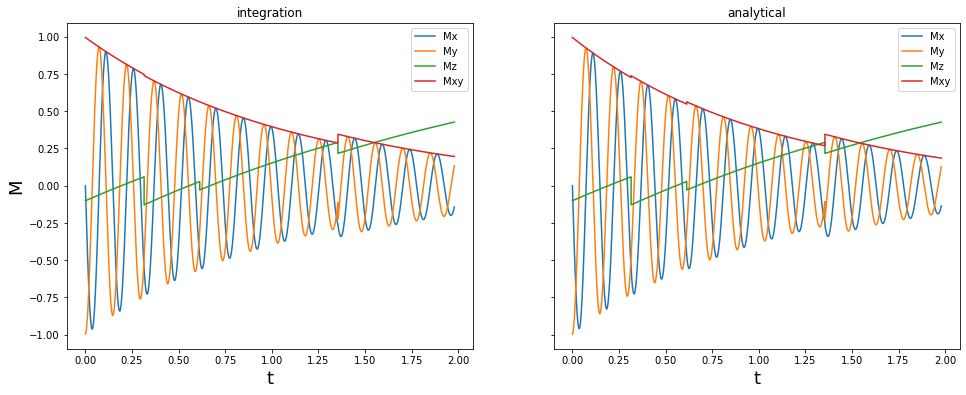

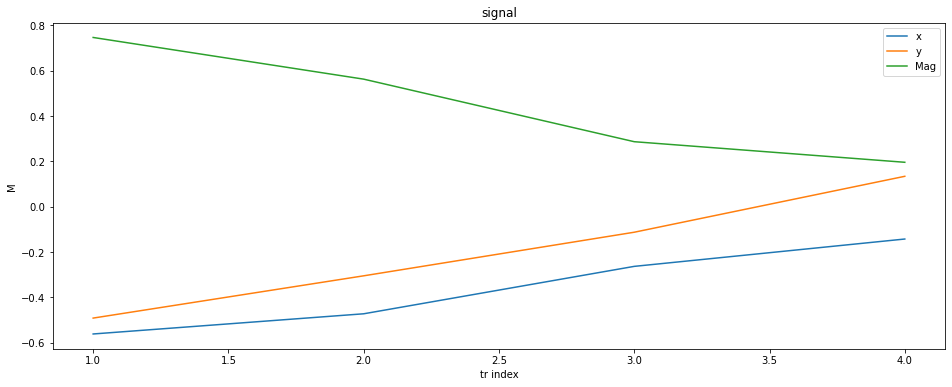

In [11]:
reps = 4
fa = np.random.uniform(5, 25, reps)
tr = np.random.uniform(0.25, 0.75, reps)
M0 = np.array([0, -1, 0]) # Initial Magnetization
B0 = np.array([0, 0, 1])
gamma = 42.58
T1 = 2
T2 = 1
t_tot, M_int, M_ana, signal = pulseSequence(fa, tr, M0, gamma, B0, T1, T2)
plotter(t_tot, M_int, M_ana)
plotSignal(signal)

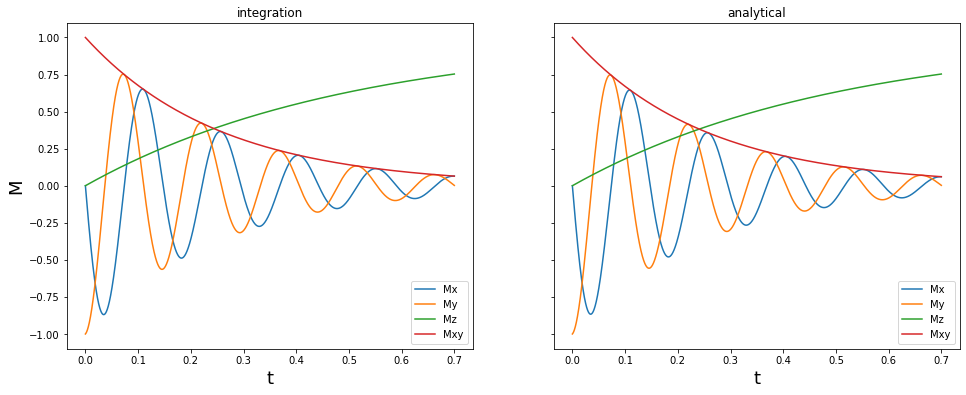

In [12]:
fa = np.array([90])
tr = np.array([0.7])
M0 = np.array([0, 0, 1]) # Initial Magnetization
B0 = np.array([0, 0, 1])
gamma = 42.58
T1 = 0.5
T2 = 0.25
t_tot, M_int, M_ana, signal = pulseSequence(fa, tr, M0, gamma, B0, T1, T2)
plotter(t_tot, M_int, M_ana)

### vpython animation

Note: animation only works once per kernel session. Must restart kernel to play animation again.

In [13]:
from vpython import *
sf = 0.9
scene.autoscale = False
scene.range = 1.25
scene.forward = vector(0, 1, 0)
scene.up = vector(0, 0, 1)
s = sphere(pos=vector(0, 0, 0), radius=0.05)
a = arrow(pos=vector(0, 0, 0), axis=vector(M_int[0, 0], M_int[0, 1], M_int[0, 2]), make_trail=True)
b0a = arrow(pos=vector(-1.1, 0, 0), axis=sf*vector(0, 0, 1), color=color.yellow)
b0b = arrow(pos=vector(1.1, 0, 0), axis=sf*vector(0, 0, 1), color=color.yellow)
b = sphere(pos=a.axis, radius=0.0001, make_trail=True)
sleep(15)
for i in range(len(M_int)):
    if(i % 3 == 0):
        a.axis = vector(M_int[i, 0], M_int[i, 1], M_int[i, 2])
        b.pos = a.axis
        sleep(5e-7)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>